# Pymaceuticals Inc.
---

### Analysis
* There is a very clear positive correlation between average tumor volume and mouse weight when looking at mice treated with the Capomulin regimen

* When checking for outliers across the 4 drug regimens, most of the data was relatively consistant. There was only one outlier for the 4 drug regimens.

* Capomulin was the drug regimen that was tested the most on a population of mice that was evenly distributed in terms of sex. When looking at tumor volume vs timepoint on the mouse I picked out, there was a downward slope on the line indicating a negative correlation.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [24]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
 
# Display the data table for preview
# merged_drop_dup_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first').reset_index(drop=True)
# merged_drop_dup_df

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].value_counts()
len(unique_mice)

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateDFRow = merged_df[merged_df.duplicated()]
print(duplicateDFRow["Mouse ID"])


861    g989
Name: Mouse ID, dtype: object


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = clean_df["Mouse ID"].value_counts()
len(unique_mice2)

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df =clean_df.groupby(["Drug Regimen"])


mean_gb = grouped_df["Tumor Volume (mm3)"].mean()
median_gb = grouped_df["Tumor Volume (mm3)"].median()
var_gb = grouped_df["Tumor Volume (mm3)"].var()
std_gb = grouped_df["Tumor Volume (mm3)"].std()
sem_gb = grouped_df["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean Tumor Volume": mean_gb,
                         "Median Tumor Volume": median_gb,
                         "Tumor Volume Variance": var_gb,
                         "Tumor Volume Std. Dev.": std_gb,
                         "Tumor Volume Std. Err.": sem_gb})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


grouped_df2 =clean_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_df2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

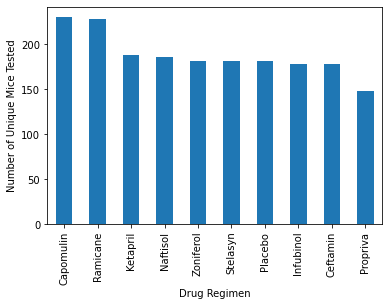

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_df["Drug Regimen"].value_counts().plot(kind='bar', rot=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

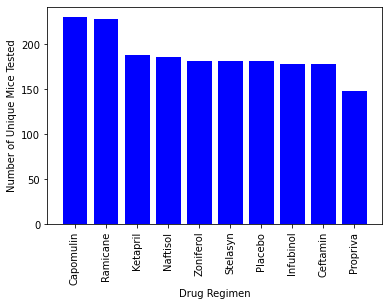

In [33]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
regimens = clean_df["Drug Regimen"].value_counts().index.tolist()
counts = clean_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(regimens))

plt.bar(x_axis, counts, color='b', align = 'center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

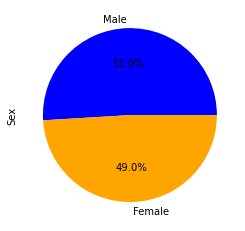

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["blue", "orange"]

clean_df["Sex"].value_counts().plot(kind='pie', colors = colors, autopct="%1.1f%%")
plt.show()

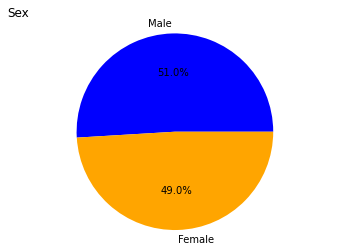

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexes = clean_df["Sex"].value_counts().index.tolist()
sex_count = clean_df["Sex"].value_counts()


plt.pie(sex_count, labels = sexes, colors = colors, autopct="%1.1f%%")
plt.title("Sex", loc = "left")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

specific_reg_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                               (clean_df["Drug Regimen"] == "Ramicane") | 
                               (clean_df["Drug Regimen"] == "Infubinol") |
                               (clean_df["Drug Regimen"] == "Ceftamin")]


last_timepoint = specific_reg_df.drop_duplicates(subset=['Mouse ID'], keep='last').reset_index(drop=True)

last_timepoint
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    new_df = last_timepoint.loc[(last_timepoint["Drug Regimen"] == drug)]
    
    # add subset 
    volumeList = new_df["Tumor Volume (mm3)"].tolist()
    tumor_vol_list.append(volumeList)
    
    # Determine outliers using upper and lower bounds
    quartiles = new_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier = new_df.loc[(new_df['Tumor Volume (mm3)'] < lower_bound) | (new_df['Tumor Volume (mm3)'] > upper_bound)]
    
    if outlier is not None:
        newList = outlier["Tumor Volume (mm3)"].tolist()
        
        for x in newList:
            print(f"{drug} possible outliers: ")
            print(x)
        
    

Infubinol possible outliers: 
36.3213458


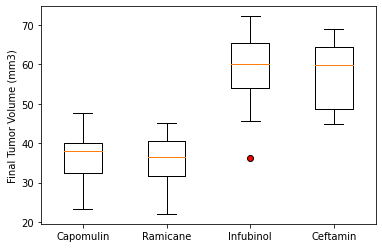

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin_Value = tumor_vol_list[0]
Ramicane_Value = tumor_vol_list[1]
Infubinol_Value = tumor_vol_list[2]
Ceftamin_Value = tumor_vol_list[3]


data = [Capomulin_Value, Ramicane_Value, Infubinol_Value, Ceftamin_Value]


red_circle = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1, 2, 3, 4], treatment_list)
plt.show()


## Line and Scatter Plots

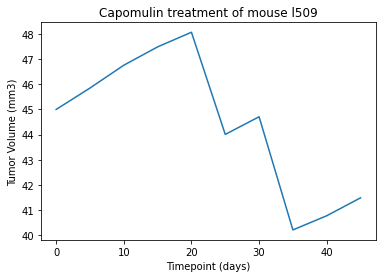

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') & (clean_df["Mouse ID"] == 'l509')]
cap_time_list = cap_df["Timepoint"].max()
cap_volume_list = cap_df["Tumor Volume (mm3)"].tolist()

x_axis_cap = np.arange(0, len(cap_volume_list), 1)

plt.plot(x_axis_cap, cap_volume_list)
plt.xticks([0, 2, 4, 6,  8], ['0', '10', '20', '30', '40'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [40]:
cap_df2 = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin')]

cap_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [41]:
avg_cap_df = cap_df2.groupby(["Mouse ID"]).mean()
avg_cap_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


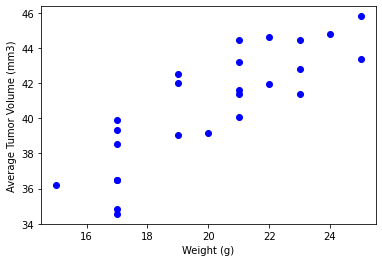

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = avg_cap_df['Weight (g)']
avg_vol = avg_cap_df['Tumor Volume (mm3)']

plt.scatter(weight, avg_vol, marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The line equation is: y = 0.95x + 21.55
The correlation between mouse weight and the average tumor volume is 0.84
The Pearson correlation is: 0.84


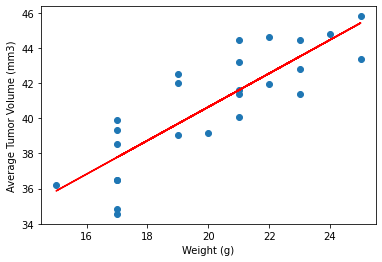

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight
y_values = avg_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The line equation is: {line_eq}")

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
correlation = st.pearsonr(x_values, y_values)
print(f"The Pearson correlation is: {round(correlation[0],2)}")

plt.show()